YAPAY SİNİR AĞLARI

- insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.
-  sinir ağları bir araya gelerek bir araya gelerek sistemi oluşturur.
- "çok katmanlı ağ" olarak da adlandırılır.
- Ağın yapısına karar verilir.
- Doğrusal değişkenler ,doğrusal olmayan değişkenlerden türetilmektedir.
- Girdiler ve çıktılar üzerinden olabilicek en min hatayı bulmayı amaçlar
- overfit olmaya meyillidir.bundan kurtulamk için birçok yol denenir.
-


In [172]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [173]:
import numpy as np
import pandas as pd
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [176]:
X_train_scaled = scaler.transform(X_train)

In [177]:
X_test_scaled = scaler.transform(X_test)

In [178]:
from sklearn.neural_network import MLPRegressor

In [179]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [180]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [181]:
mlp_model.n_layers_

4

In [182]:
mlp_model.hidden_layer_sizes

(100, 20)

In [183]:
#tahmin
mlp_model.predict(X_train_scaled)[0:5]

array([114.1466185 , 487.92443255, 294.42409856, 124.02308549,
        92.9960402 ])

In [184]:
y_pred = mlp_model.predict(X_test_scaled)

In [185]:
np.sqrt(mean_squared_error(y_test,y_pred))

415.28714043076303

In [186]:
#model tuning
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [187]:
mlp_params = {'alpha':[0.1,0.01,0.02,0.005],'hidden_layer_sizes':[(20,20),(100,50,150),(300,200,150)],'activation':['relu','logistic']}

In [188]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10)

In [189]:
##mlp_cv_model.fit(X_train_scaled, y_train)

In [190]:
mlp_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
mlp_tuned = MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.19585231657385

CLASSİFİCATİON AND REGRESSİON TREES(CART)(KARAR AĞAÇLARI)

- amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektedir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
- genel olarak belirli koşullarla ağaç yapısı üzerinden kısıtlamalar yer alır ve duruma göre ksııtlar takip edilerek sonuca ulaşılır.
- overfitting durumu burada da mevcuttur.
- karmaşıklık parametresi yer alır ve belli bir noktada dallanmaları durdurur.


In [191]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [192]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [193]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [194]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [195]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_1692/1457480431.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


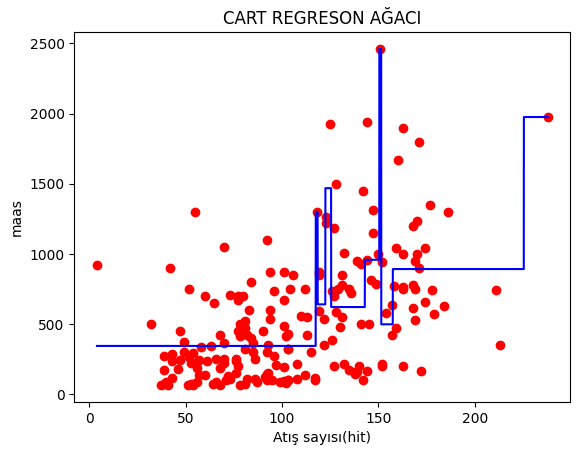

In [196]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_grid,cart_model.predict(X_grid),color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış sayısı(hit)')
plt.ylabel("maas");

In [197]:
!pip install skompiler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [198]:
!pip install astor


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [199]:
from skompiler import skompile

In [200]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [201]:
#Tahmin
x = [91]
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [202]:
cart_model.predict(X_test)[0:10]


array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517, 345.20115517, 892.54024138, 958.61111111,
       892.54024138, 345.20115517])

In [203]:
cart_model.predict([[91]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([345.20115517])

In [204]:
y_pred = cart_model.predict(X_test)

In [205]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [206]:

cart_model = DecisionTreeRegressor()
cart_model.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)



In [207]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [214]:
cart_params = {"min_sample_split": range(2,100), "max_leaf_nodes": range(2,10)}

In [209]:
cart_cv_model = GridSearchCV(cart_model, cart_params ,cv=10)

In [210]:
#cart_cv_model.fit(X_train,y_train)

In [211]:
cart_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
cart_model = DecisionTreeRegressor(max_leaf_nodes=2)

# Define the parameter grid with the correct parameter name
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]  # Corrected to 'min_samples_split'
}

# Set up GridSearchCV with the model and parameters
cart_cv_model = GridSearchCV(cart_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
cart_cv_model.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_leaf_nodes=2),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [217]:
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [218]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)

In [219]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [220]:
y_pred = cart_tuned.predict(X_test)

In [221]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066